In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates














In [3]:
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [4]:
# 1. How many different companies are represented in the data set?
company_counts = data["Company Name"].nunique()

print('There are {} different companies represented in the data set.'.format(company_counts))

There are 439 different companies represented in the data set.


In [5]:
# 2. What is the total number of jobs created for businesses in Queens?
data1 = data[data['City'] == 'Queens']
njob_sum = int(data1['Job created'].sum())

print('The total number of jobs created for businesses in Queens is {}.'.format(njob_sum))

The total number of jobs created for businesses in Queens is 90.


In [6]:
# 3. How many different unique email domains names are there in the data set?
data2 = data[data['company email'].notnull()]
data2 = data2[~data2['company email'].str.contains('@')]
uniq_domain = data2['company email'].nunique()
domain = data['company email'].str.split('@').str[1]
uniq_domain1 = domain.nunique()

print('There are {} different unique email domains names in the data set.'.format(uniq_domain+uniq_domain1))

There are 361 different unique email domains names in the data set.


In [7]:
# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
count = data['NTA'].value_counts()
count = count[count >= 5]
NTA = list(count.index)
data3 = data[data['NTA'].isin(NTA)]
NTA_avg = data3.groupby('NTA')[['Total Savings']].mean()
NTA_avg1 = data3.groupby('NTA')[['Job created']].sum()
NTA_avg2 = pd.concat([NTA_avg,NTA_avg1],axis=1)
print("The average total savings and the total jobs created for each NTA with at least 5 listed businesses are shown below:")
print(tabulate(NTA_avg2, headers='keys', tablefmt='psql'))
#NTA_avg2.to_csv('C:/Users/caozi/Desktop/TDI/Milestone project/nta_summary.csv')

The average total savings and the total jobs created for each NTA with at least 5 listed businesses are shown below:
+--------------------------------------------------+-----------------+---------------+
| NTA                                              |   Total Savings |   Job created |
|--------------------------------------------------+-----------------+---------------|
| Battery Park City-Lower Manhattan                |       469891    |             0 |
| Bushwick South                                   |        26140.5  |            10 |
| Carroll Gardens-Columbia Street-Red Hook         |        24337.4  |             0 |
| College Point                                    |        17159.4  |             2 |
| Crown Heights North                              |         4036.3  |             0 |
| DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill |        59950.3  |             0 |
| East New York                                    |        48433.1  |            15 |
| East Willia

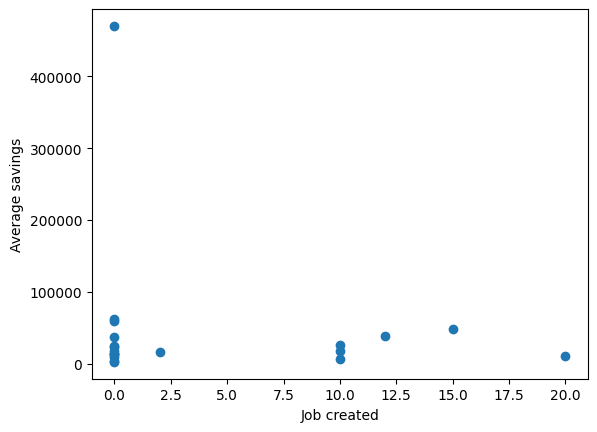

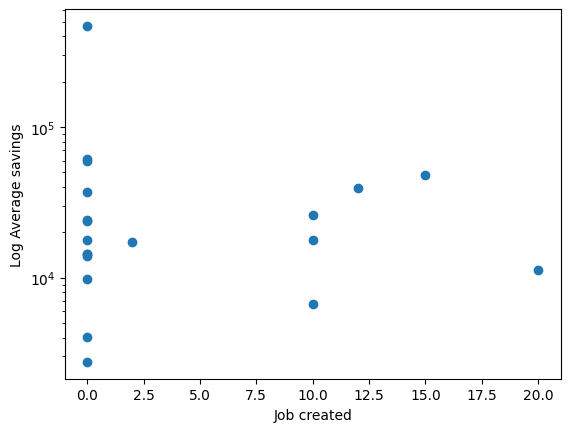

In [8]:
# scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
plt.scatter(NTA_avg2['Job created'],NTA_avg2['Total Savings'])
plt.xlabel('Job created')
plt.ylabel('Average savings')
plt.show()

plt.scatter(NTA_avg2['Job created'],NTA_avg2['Total Savings'])
plt.yscale('log')
plt.xlabel('Job created')
plt.ylabel('Log Average savings')
plt.show()

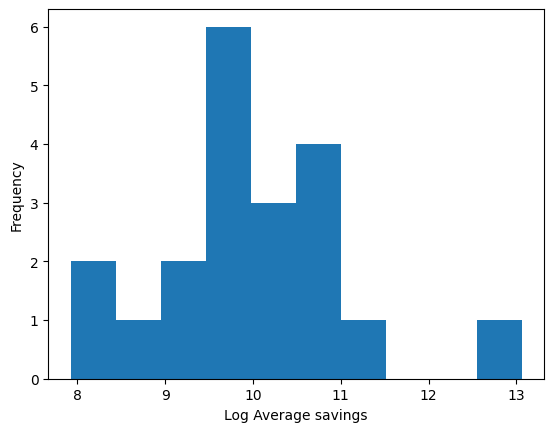

In [9]:
# histogram of the log of the average total savings.
np.log(NTA_avg2['Total Savings']).plot.hist()
plt.xlabel('Log Average savings')
plt.show()

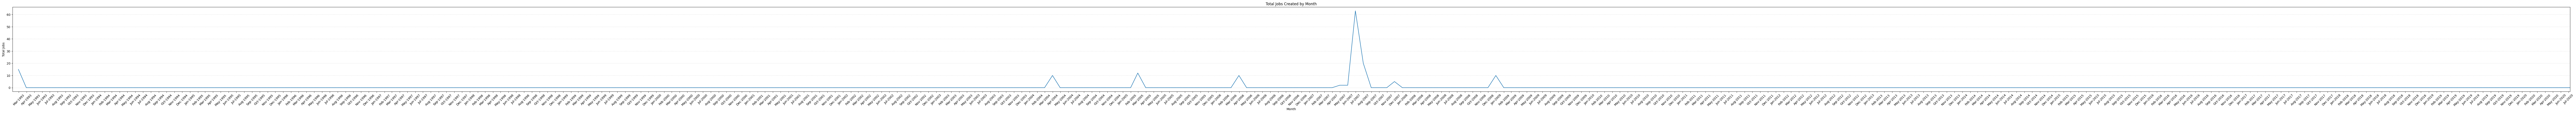

In [34]:
# line plot of the total jobs created for each month.
data4 = data.dropna(subset=['Effective Date'])
data4['month'] = pd.to_datetime(data4['Effective Date'],format='%m/%d/%Y')
df_grouped = data4.groupby(pd.Grouper(key='month', freq='M')).sum(numeric_only=True)
df_grouped['Job created']

fig, ax = plt.subplots(figsize=(150, 5))
ax.plot(df_grouped['Job created'])

date_form = mdates.DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.tick_params(axis='x', rotation=45)

earliest_month = data4['month'].min()
latest_month = data4['month'].max()

ax.set_xlim(earliest_month, latest_month)
ax.grid(axis='y', linestyle=':', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Total Jobs')
plt.title('Total Jobs Created by Month')
plt.show()